# 0. Описание задачи

Построить модель классификации для предсказания признака outcome в наборе данных. Данный признак может представлять категорию или результат, который мы хотим предсказать на основе других характеристик, таких как age, gender, credit_score и т.д.

# 1. Прочитать данные

In [1]:
import numpy as np              # Одномерные и многомерные массивы (array)
import pandas as pd             # Таблицы и временные ряды (dataframe, series)
import matplotlib.pyplot as plt # Научная графика
import seaborn as sns           # Еще больше красивой графики для визуализации данных
import sklearn                  # Алгоритмы машинного обучения
import scipy.stats as stats
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
import sklearn.neighbors
import sklearn.ensemble
import sklearn.linear_model
import sklearn.neural_network

In [2]:
from google.colab import files

# Загрузка файла
uploaded = files.upload()

# Чтение данных
df = pd.read_csv('customer-data.csv')

Saving customer-data.csv to customer-data.csv


In [3]:
print(df.shape)        # Размер набора данных
print(df.columns)      # Названия столбцов
print(df.head())       # Первые несколько строк для обзора структуры данных

(10000, 19)
Index(['id', 'age', 'gender', 'race', 'driving_experience', 'education',
       'income', 'credit_score', 'vehicle_ownership', 'vehicle_year',
       'married', 'children', 'postal_code', 'annual_mileage', 'vehicle_type',
       'speeding_violations', 'DUIs', 'past_accidents', 'outcome'],
      dtype='object')
       id    age  gender      race driving_experience    education  \
0  569520    65+  female  majority               0-9y  high school   
1  750365  16-25    male  majority               0-9y         none   
2  199901  16-25  female  majority               0-9y  high school   
3  478866  16-25    male  majority               0-9y   university   
4  731664  26-39    male  majority             10-19y         none   

          income  credit_score  vehicle_ownership vehicle_year  married  \
0    upper class      0.629027               True   after 2015    False   
1        poverty      0.357757              False  before 2015    False   
2  working class      0.493146

In [4]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   10000 non-null  int64  
 1   age                  10000 non-null  object 
 2   gender               10000 non-null  object 
 3   race                 10000 non-null  object 
 4   driving_experience   10000 non-null  object 
 5   education            10000 non-null  object 
 6   income               10000 non-null  object 
 7   credit_score         9018 non-null   float64
 8   vehicle_ownership    10000 non-null  bool   
 9   vehicle_year         10000 non-null  object 
 10  married              10000 non-null  bool   
 11  children             10000 non-null  bool   
 12  postal_code          10000 non-null  int64  
 13  annual_mileage       9043 non-null   float64
 14  vehicle_type         10000 non-null  object 
 15  speeding_violations  10000 non-null  

id: Уникальный идентификатор записи или наблюдения в датасете. Используется для отслеживания отдельных записей.

age: Возраст водителя. Может влиять на риск аварий и страховые премии.

gender: Пол водителя (например, мужской или женский). Может использоваться для анализа различий в поведении на дороге.

race: Расовая или этническая принадлежность водителя. Может быть использована для изучения предвзятости или анализа рисков.

driving_experience: Опыт вождения, измеряемый в годах. Более длительный опыт может свидетельствовать о более высоком уровне навыков вождения.

education: Уровень образования водителя (например, среднее образование, высшее образование и т.д.). Может коррелировать с доходом и ответственностью на дороге.

income: Годовой доход водителя. Может использоваться для оценки финансовой стабильности и возможностей для страхования.

credit_score: Кредитный рейтинг водителя. Высокий кредитный рейтинг может указывать на финансовую благонадежность.

vehicle_ownership: Статус владения автомобилем (например, собственный, арендованный). Влияет на использование автомобиля и страховку.

vehicle_year: Год выпуска автомобиля. Может влиять на стоимость и безопасность автомобиля.

married: Статус в браке (например, женат/неженат). Может быть связан с риском аварий и изменениями в поведении водителей.

children: Количество детей у водителя. Может влиять на риск аварий и выбор транспортного средства.

postal_code: Почтовый индекс места проживания водителя. Может использоваться для анализа географических факторов и условий вождения.

annual_mileage: Годовой пробег автомобиля. Более высокий пробег может увеличивать риск аварий и влиять на страховку.

vehicle_type: Тип автомобиля (например, легковой, внедорожник, грузовик). Может влиять на характеристики безопасности и риск аварий.

speeding_violations: Количество нарушений скорости, совершенных водителем. Связано с агрессивностью вождения и риском аварий.

DUIs: Количество нарушений, связанных с вождением в состоянии алкогольного опьянения (DUI). Высокое значение указывает на рискованное поведение.

past_accidents: Количество аварий, в которых участвовал водитель в прошлом. Может использоваться для оценки уровня риска.

outcome: Итоговое событие или результат, например, наличие или отсутствие аварии, страхового случая и т. д. Может быть целевой переменной для задач классификации или регрессии.

# 2. Визуализировать данные и вычислить основные характеристики

                  id  credit_score   postal_code  annual_mileage  \
count   10000.000000   9018.000000  10000.000000     9043.000000   
mean   500521.906800      0.515813  19864.548400    11697.003207   
std    290030.768758      0.137688  18915.613855     2818.434528   
min       101.000000      0.053358  10238.000000     2000.000000   
25%    249638.500000      0.417191  10238.000000    10000.000000   
50%    501777.000000      0.525033  10238.000000    12000.000000   
75%    753974.500000      0.618312  32765.000000    14000.000000   
max    999976.000000      0.960819  92101.000000    22000.000000   

       speeding_violations         DUIs  past_accidents  
count         10000.000000  10000.00000    10000.000000  
mean              1.482900      0.23920        1.056300  
std               2.241966      0.55499        1.652454  
min               0.000000      0.00000        0.000000  
25%               0.000000      0.00000        0.000000  
50%               0.000000      0.00000

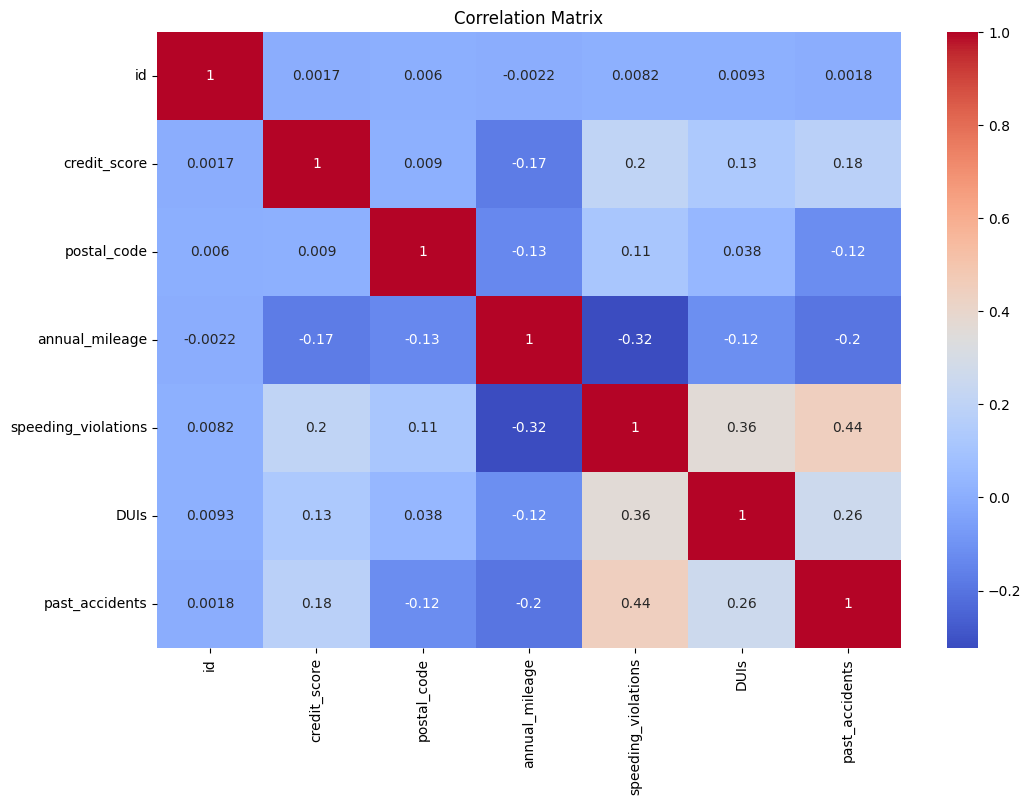

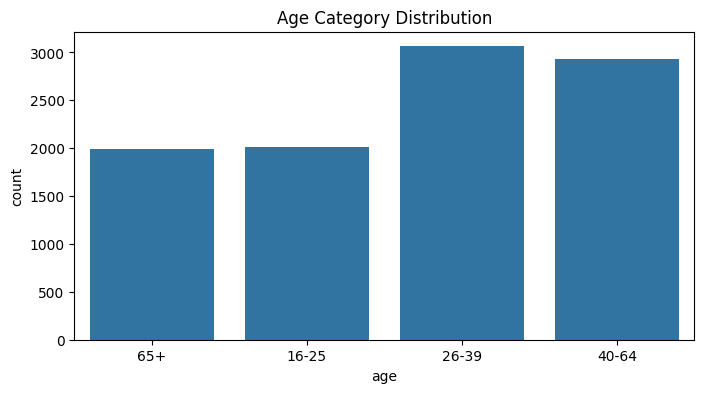

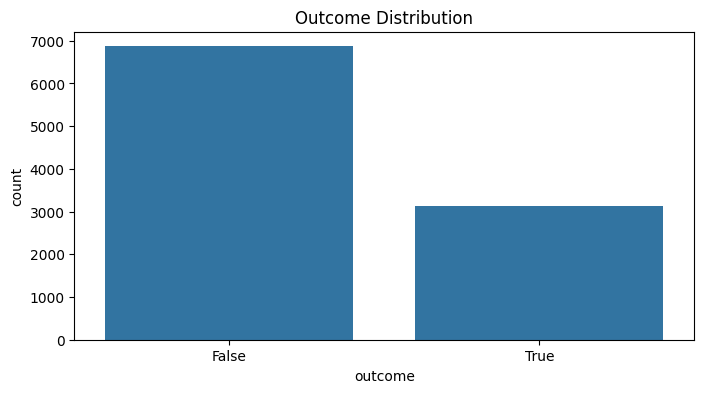

In [5]:
# Описательные статистики числовых признаков
print(df.describe())

# Корреляционная матрица для числовых признаков
plt.figure(figsize=(12, 8))
sns.heatmap(df.select_dtypes(include=[float, int]).corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Распределение возрастных категорий
plt.figure(figsize=(8, 4))
sns.countplot(data=df, x='age')
plt.title('Age Category Distribution')
plt.show()

# Распределение целевой переменной (outcome)
plt.figure(figsize=(8, 4))
sns.countplot(data=df, x='outcome')
plt.title('Outcome Distribution')
plt.show()

Признак id — это уникальный идентификатор и не несет полезной информации для классификации, поэтому его можно удалить.

Признак postal_code — если задача не предполагает анализа местоположения, можно его исключить, так как он может не быть значимым для предсказания outcome.

In [6]:
df = df.drop(columns=['id', 'postal_code'])
print("Оставшиеся признаки:", df.columns)

Оставшиеся признаки: Index(['age', 'gender', 'race', 'driving_experience', 'education', 'income',
       'credit_score', 'vehicle_ownership', 'vehicle_year', 'married',
       'children', 'annual_mileage', 'vehicle_type', 'speeding_violations',
       'DUIs', 'past_accidents', 'outcome'],
      dtype='object')


Преобразование vehicle_year в числовой формат (возраст автомобиля)

In [7]:
df['vehicle_year'] = np.where(df['vehicle_year'] == 'after 2015', 1, 0)

print(df[['vehicle_year']].head())
# Корреляция vehicle_year с outcome
correlation = df[['vehicle_year', 'outcome']].corr()
print("Корреляция vehicle_year с outcome:", correlation)

   vehicle_year
0             1
1             0
2             0
3             0
4             0
Корреляция vehicle_year с outcome:               vehicle_year   outcome
vehicle_year      1.000000 -0.294178
outcome          -0.294178  1.000000


Поскольку корреляция слабая, можно рассмотреть вариант исключения vehicle_year из данных, если это поможет упростить модель. Однако, если в задаче важны даже слабые связи, этот признак можно оставить.

       credit_score  vehicle_year  annual_mileage  speeding_violations  \
count   9018.000000  10000.000000     9043.000000         10000.000000   
mean       0.515813      0.303300    11697.003207             1.482900   
std        0.137688      0.459707     2818.434528             2.241966   
min        0.053358      0.000000     2000.000000             0.000000   
25%        0.417191      0.000000    10000.000000             0.000000   
50%        0.525033      0.000000    12000.000000             0.000000   
75%        0.618312      1.000000    14000.000000             2.000000   
max        0.960819      1.000000    22000.000000            22.000000   

              DUIs  past_accidents  
count  10000.00000    10000.000000  
mean       0.23920        1.056300  
std        0.55499        1.652454  
min        0.00000        0.000000  
25%        0.00000        0.000000  
50%        0.00000        0.000000  
75%        0.00000        2.000000  
max        6.00000       15.000000  


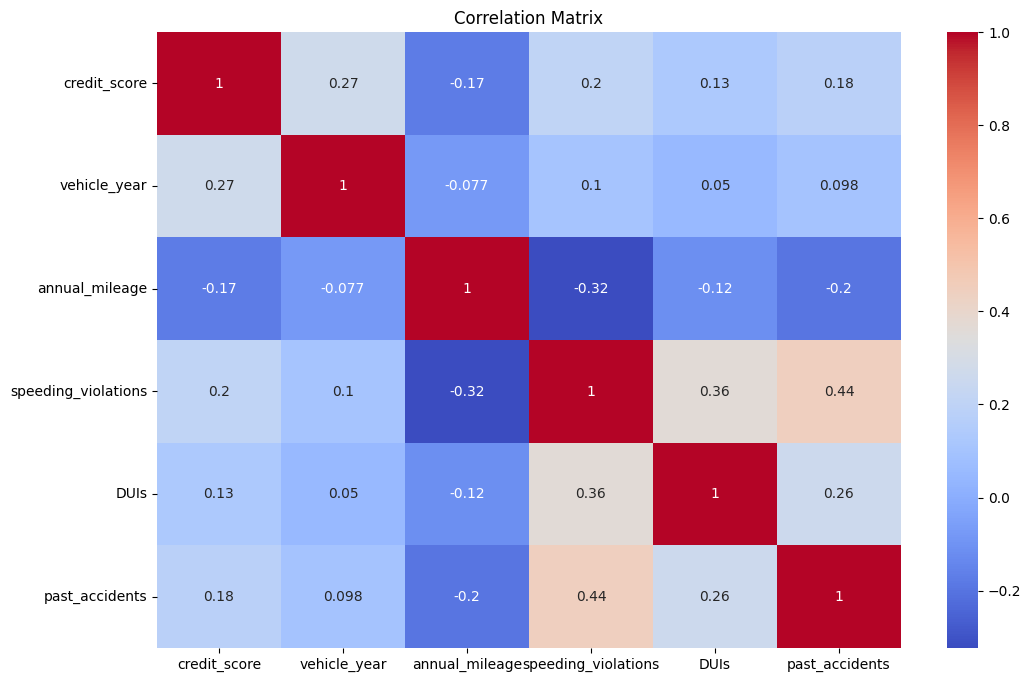

In [8]:
# Описательные статистики числовых признаков
print(df.describe())

# Корреляционная матрица для числовых признаков
plt.figure(figsize=(12, 8))
sns.heatmap(df.select_dtypes(include=[float, int]).corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# 3. Обработка пропущенных значений.

In [9]:
# Проверка наличия пропусков в каждом признаке
missing_info = df.isnull().sum()
print(missing_info)

age                      0
gender                   0
race                     0
driving_experience       0
education                0
income                   0
credit_score           982
vehicle_ownership        0
vehicle_year             0
married                  0
children                 0
annual_mileage         957
vehicle_type             0
speeding_violations      0
DUIs                     0
past_accidents           0
outcome                  0
dtype: int64


In [10]:
# Заполнение пропусков медианными значениями для числовых признаков
df['credit_score'] = df['credit_score'].fillna(df['credit_score'].median())
df['annual_mileage'] = df['annual_mileage'].fillna(df['annual_mileage'].median())

# Проверка, что все пропуски устранены
print("\nПроверка на пропуски после обработки:\n", df.isnull().sum().sum())


Проверка на пропуски после обработки:
 0


# 4. Обработка категориальных признаков

In [11]:
print(df.columns)

Index(['age', 'gender', 'race', 'driving_experience', 'education', 'income',
       'credit_score', 'vehicle_ownership', 'vehicle_year', 'married',
       'children', 'annual_mileage', 'vehicle_type', 'speeding_violations',
       'DUIs', 'past_accidents', 'outcome'],
      dtype='object')


Преобразование категориальных переменных в бинарные столбцы часто повышает точность моделей машинного обучения, так как позволяет им лучше захватывать связи между переменными.

In [12]:
df = pd.get_dummies(df)
print(df.columns)

Index(['credit_score', 'vehicle_ownership', 'vehicle_year', 'married',
       'children', 'annual_mileage', 'speeding_violations', 'DUIs',
       'past_accidents', 'outcome', 'age_16-25', 'age_26-39', 'age_40-64',
       'age_65+', 'gender_female', 'gender_male', 'race_majority',
       'race_minority', 'driving_experience_0-9y', 'driving_experience_10-19y',
       'driving_experience_20-29y', 'driving_experience_30y+',
       'education_high school', 'education_none', 'education_university',
       'income_middle class', 'income_poverty', 'income_upper class',
       'income_working class', 'vehicle_type_sedan',
       'vehicle_type_sports car'],
      dtype='object')


       credit_score  vehicle_year  annual_mileage  speeding_violations  \
count  10000.000000  10000.000000    10000.000000         10000.000000   
mean       0.516718      0.303300    11726.000000             1.482900   
std        0.130781      0.459707     2681.649329             2.241966   
min        0.053358      0.000000     2000.000000             0.000000   
25%        0.431509      0.000000    10000.000000             0.000000   
50%        0.525033      0.000000    12000.000000             0.000000   
75%        0.607607      1.000000    13000.000000             2.000000   
max        0.960819      1.000000    22000.000000            22.000000   

              DUIs  past_accidents  
count  10000.00000    10000.000000  
mean       0.23920        1.056300  
std        0.55499        1.652454  
min        0.00000        0.000000  
25%        0.00000        0.000000  
50%        0.00000        0.000000  
75%        0.00000        2.000000  
max        6.00000       15.000000  


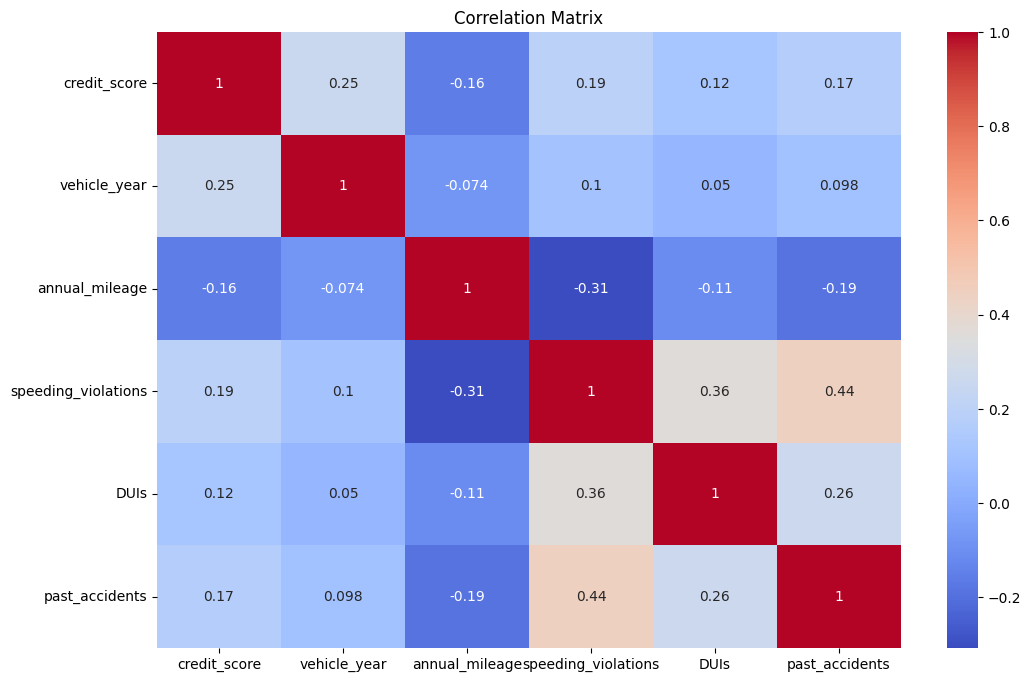

In [13]:
# Описательные статистики числовых признаков
print(df.describe())

# Корреляционная матрица для числовых признаков
plt.figure(figsize=(12, 8))
sns.heatmap(df.select_dtypes(include=[float, int]).corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# 5. Провести нормализацию

Рассматриваем какой метод нормализации пременить. Также смотрим распределние признаков credit_score и annual_mileage и их выбросы.

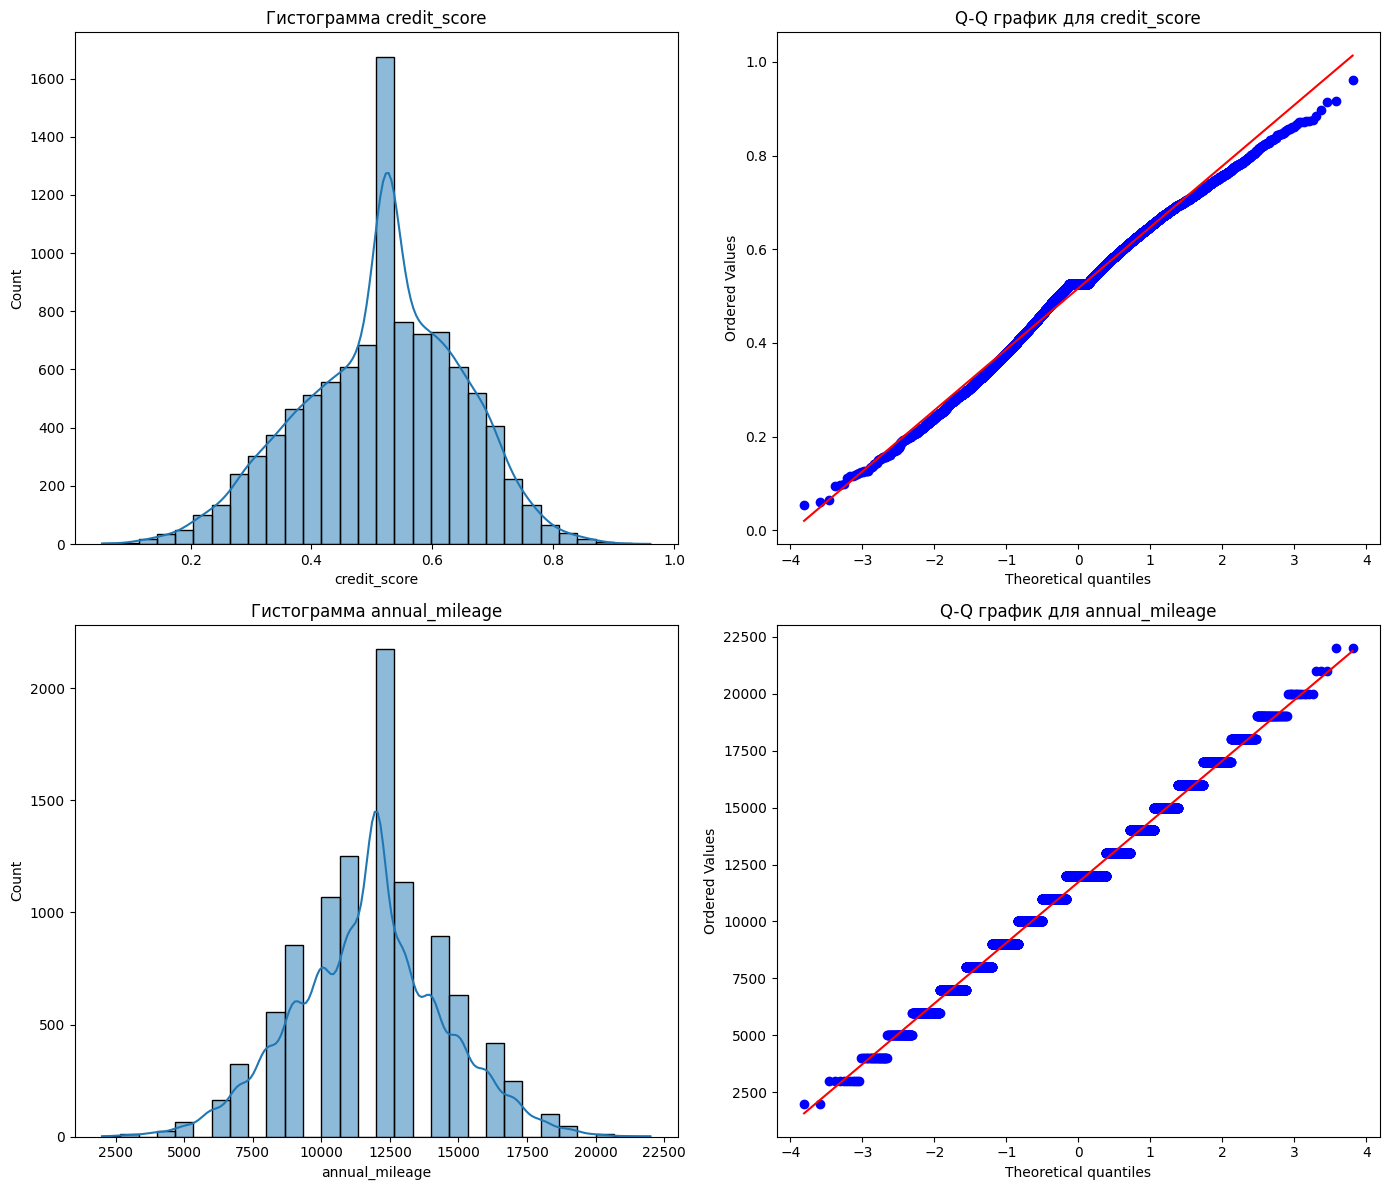

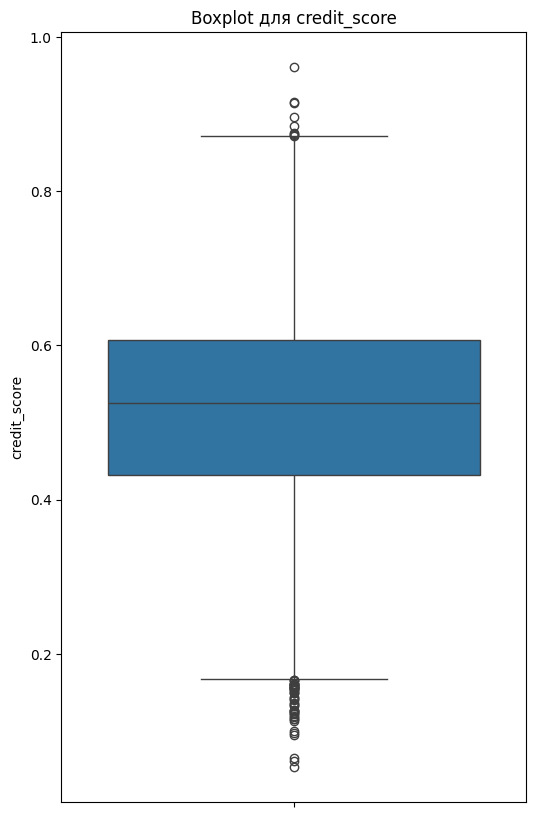

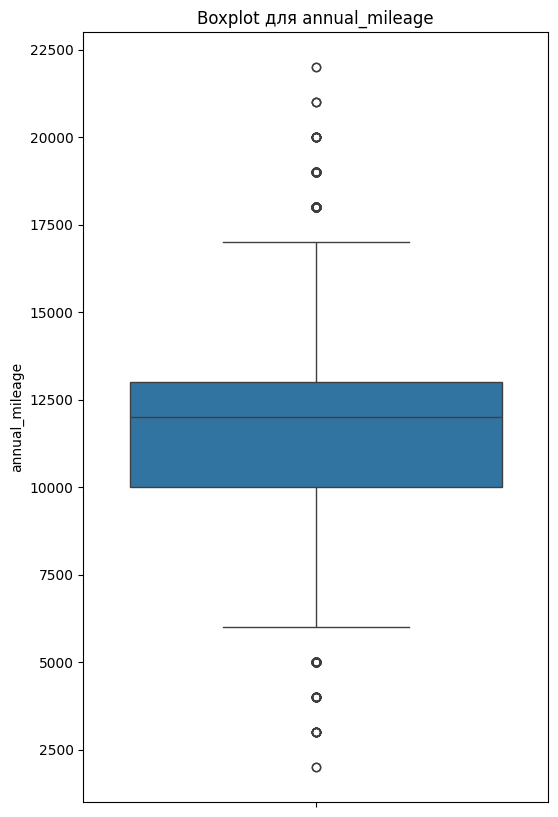

In [14]:
plt.figure(figsize=(14, 12))

# Анализ переменной credit_score
plt.subplot(2, 2, 1)
sns.histplot(df['credit_score'], bins=30, kde=True)
plt.title('Гистограмма credit_score')

plt.subplot(2, 2, 2)
stats.probplot(df['credit_score'], dist="norm", plot=plt)
plt.title('Q-Q график для credit_score')

# Анализ переменной annual_mileage
plt.subplot(2, 2, 3)
sns.histplot(df['annual_mileage'], bins=30, kde=True)
plt.title('Гистограмма annual_mileage')

plt.subplot(2, 2, 4)
stats.probplot(df['annual_mileage'], dist="norm", plot=plt)
plt.title('Q-Q график для annual_mileage')

plt.tight_layout()
plt.show()

# Анализ выбросов для credit_score
plt.figure(figsize=(6, 10))
sns.boxplot(y=df['credit_score'])
plt.title('Boxplot для credit_score')
plt.ylabel('credit_score')
plt.show()

# Анализ выбросов для annual_mileage
plt.figure(figsize=(6, 10))
sns.boxplot(y=df['annual_mileage'])
plt.title('Boxplot для annual_mileage')
plt.ylabel('annual_mileage')
plt.show()

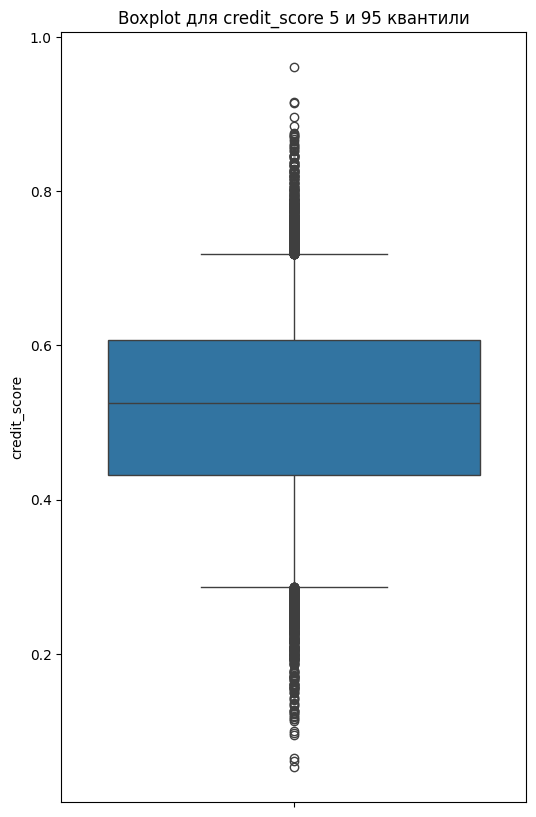

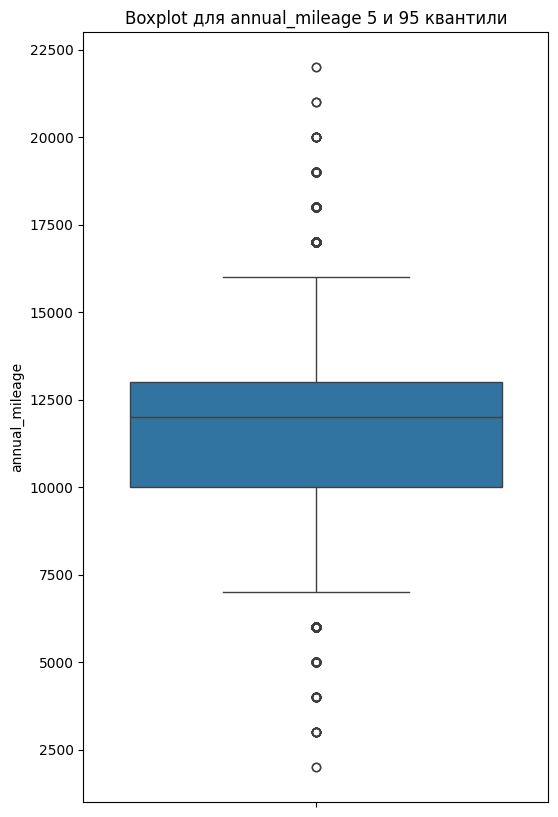

In [15]:
plt.figure(figsize=(6, 10))
sns.boxplot(y=df['credit_score'], whis=[5, 95])
plt.title('Boxplot для credit_score 5 и 95 квантили')
plt.ylabel('credit_score')
plt.show()

plt.figure(figsize=(6, 10))
sns.boxplot(y=df['annual_mileage'], whis=[5, 95])
plt.title('Boxplot для annual_mileage 5 и 95 квантили')
plt.ylabel('annual_mileage')
plt.show()

Нормализуем методом стандартизации

In [16]:
df_normalized = (df - df.mean(axis = 0)) / df.std(axis = 0)
print(df[['credit_score', 'annual_mileage', 'speeding_violations', 'DUIs', 'past_accidents']].describe())
print(df_normalized[['credit_score', 'annual_mileage', 'speeding_violations', 'DUIs', 'past_accidents']].describe())

       credit_score  annual_mileage  speeding_violations         DUIs  \
count  10000.000000    10000.000000         10000.000000  10000.00000   
mean       0.516718    11726.000000             1.482900      0.23920   
std        0.130781     2681.649329             2.241966      0.55499   
min        0.053358     2000.000000             0.000000      0.00000   
25%        0.431509    10000.000000             0.000000      0.00000   
50%        0.525033    12000.000000             0.000000      0.00000   
75%        0.607607    13000.000000             2.000000      0.00000   
max        0.960819    22000.000000            22.000000      6.00000   

       past_accidents  
count    10000.000000  
mean         1.056300  
std          1.652454  
min          0.000000  
25%          0.000000  
50%          0.000000  
75%          2.000000  
max         15.000000  
       credit_score  annual_mileage  speeding_violations          DUIs  \
count  1.000000e+04    1.000000e+04         1.000000

# 6. Разбить данные на обучающую и тестовую выборки

Разделим наши данные на обучающую и тестовую выборки в соотношении 3 к 1.

In [30]:
# Определение признаков и целевой переменной
X = df_normalized.drop(columns=['outcome'])  # Признаки
y = df['outcome']  # Целевая переменная

# Разделение данных на обучающую и тестовую выборки (3:1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# 7. Запустить классификатор
# 8. Вычислить ошибки на обучающей и тестовой выборках. Выбрать оптимальное значение гиперпараметра

**K ближайших соседей**

4 соседа

In [31]:
model = sklearn.neighbors.KNeighborsClassifier(n_neighbors=4)
model.fit(X_train.values, y_train.values)
y_train_pred = model.predict(X_train.values)
y_test_pred = model.predict(X_test.values)

# Оценка модели с использованием точности
train_accuracy = sklearn.metrics.accuracy_score(y_train, y_train_pred)
test_accuracy = sklearn.metrics.accuracy_score(y_test, y_test_pred)

print(f'Точность:\nОбучающая: {train_accuracy}, Тестовая: {test_accuracy}')

#отчет о классификации
print("\nОтчет о классификации для тестовой выборки:")
print(sklearn.metrics.classification_report(y_test, y_test_pred))

Точность:
Обучающая: 0.8645333333333334, Тестовая: 0.7876

Отчет о классификации для тестовой выборки:
              precision    recall  f1-score   support

       False       0.80      0.91      0.86      1723
        True       0.73      0.51      0.60       777

    accuracy                           0.79      2500
   macro avg       0.77      0.71      0.73      2500
weighted avg       0.78      0.79      0.78      2500



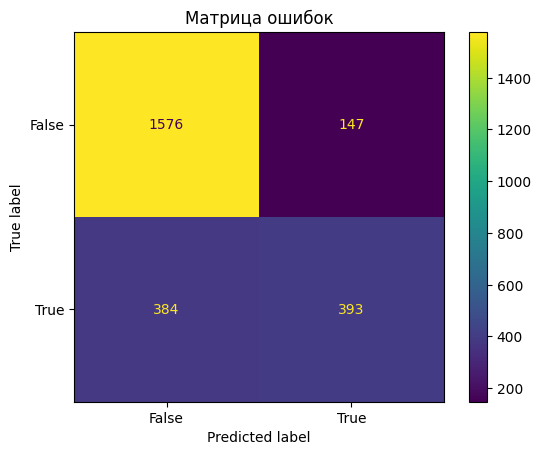

In [32]:
# Создание матрицы ошибок
confusion_matrix = sklearn.metrics.confusion_matrix(y_test, y_test_pred)

# Отображение матрицы ошибок
confusion_matrix_display = sklearn.metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_matrix, display_labels=model.classes_)
confusion_matrix_display.plot()
plt.title('Матрица ошибок')
plt.show()

8 соседей

In [33]:
model = sklearn.neighbors.KNeighborsClassifier(n_neighbors=8)
model.fit(X_train.values, y_train.values)
y_train_pred = model.predict(X_train.values)
y_test_pred = model.predict(X_test.values)

# Оценка модели с использованием точности
train_accuracy = sklearn.metrics.accuracy_score(y_train, y_train_pred)
test_accuracy = sklearn.metrics.accuracy_score(y_test, y_test_pred)

print(f'Точность:\nОбучающая: {train_accuracy}, Тестовая: {test_accuracy}')

#отчет о классификации
print("\nОтчет о классификации для тестовой выборки:")
print(sklearn.metrics.classification_report(y_test, y_test_pred))

Точность:
Обучающая: 0.8465333333333334, Тестовая: 0.8096

Отчет о классификации для тестовой выборки:
              precision    recall  f1-score   support

       False       0.83      0.91      0.87      1723
        True       0.75      0.59      0.66       777

    accuracy                           0.81      2500
   macro avg       0.79      0.75      0.76      2500
weighted avg       0.80      0.81      0.80      2500



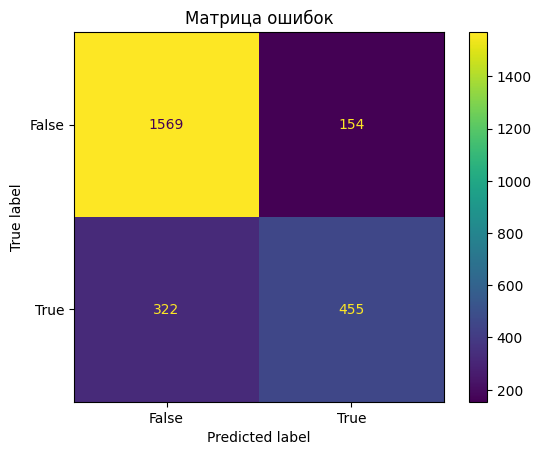

In [34]:
# Создание матрицы ошибок
confusion_matrix = sklearn.metrics.confusion_matrix(y_test, y_test_pred)

# Отображение матрицы ошибок
confusion_matrix_display = sklearn.metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_matrix, display_labels=model.classes_)
confusion_matrix_display.plot()
plt.title('Матрица ошибок')
plt.show()

Поиск оптимального количества соседей

In [41]:
# Определение модели K ближайших соседей
model = KNeighborsClassifier()

# Подбор оптимального количества соседей с кросс-валидацией
grid = GridSearchCV(model, param_grid={'n_neighbors': range(1, 16)}, cv=10, scoring='accuracy')
grid.fit(X_train.values, y_train.values)

# Вывод оптимального числа соседей
print(f"Оптимальное количество соседей: {grid.best_params_['n_neighbors']}")

# Получение модели с оптимальным числом соседей
best_model = grid.best_estimator_

# Предсказания на обучающей и тестовой выборках
y_train_pred = best_model.predict(X_train.values)
y_test_pred = best_model.predict(X_test.values)

# Вывод ошибок в виде точности
print(f"\nТочность:\nОбучающая: {accuracy_score(y_train, y_train_pred)}, Тестовая: {accuracy_score(y_test, y_test_pred)}")

Оптимальное количество соседей: 10

Точность:
Обучающая: 0.8453333333333334, Тестовая: 0.812


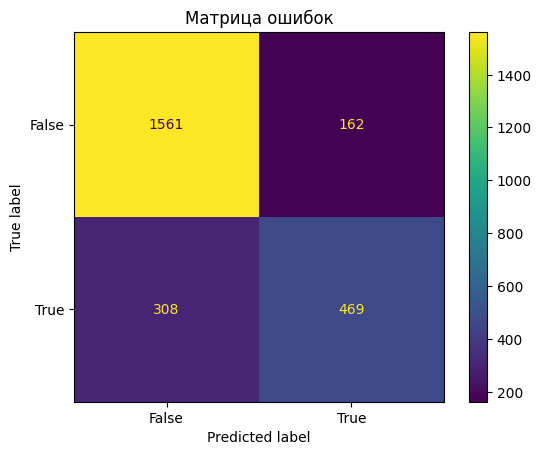

In [37]:
# Создание матрицы ошибок
confusion_matrix = sklearn.metrics.confusion_matrix(y_test, y_test_pred)

# Отображение матрицы ошибок
confusion_matrix_display = sklearn.metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_matrix, display_labels=best_model.classes_)
confusion_matrix_display.plot()
plt.title('Матрица ошибок')
plt.show()

**Случайный лес**

In [38]:
# Инициализация модели случайного леса
model = RandomForestClassifier(random_state=0)

# Обучение модели на тренировочной выборке
model.fit(X_train.values, y_train.values)

# Предсказания на обучающей и тестовой выборках
y_train_pred = model.predict(X_train.values)
y_test_pred = model.predict(X_test.values)

# Вывод точности на обучающей и тестовой выборках
print(f"\nТочность:\nОбучающая: {accuracy_score(y_train, y_train_pred)}, Тестовая: {accuracy_score(y_test, y_test_pred)}")


Точность:
Обучающая: 0.9992, Тестовая: 0.822


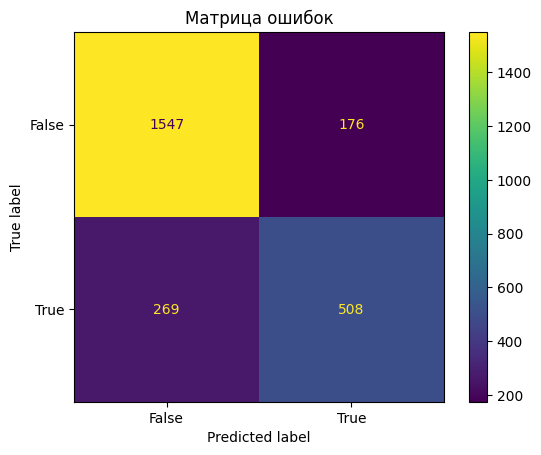

In [39]:
# Создание матрицы ошибок
confusion_matrix = sklearn.metrics.confusion_matrix(y_test, y_test_pred)

# Отображение матрицы ошибок
confusion_matrix_display = sklearn.metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_matrix, display_labels=model.classes_)
confusion_matrix_display.plot()
plt.title('Матрица ошибок')
plt.show()

# 12. Сделать общие выводы

Мы начали с подготовки данных, включая стандартизацию и обработку выбросов. Это позволило улучшить обобщающую способность моделей и обеспечить их более стабильную работу на разнородных данных. Оптимальное значение n_neighbors = 10 было выбрано на основе подбора гиперпараметров с использованием кросс-валидации, что позволило достичь лучшей точности на тестовой выборке. Модель KNN показала точность 0.845 на обучающей и 0.812 на тестовой выборке. Это говорит о том, что модель обобщает неплохо, но её точность ниже, чем у случайного леса, из-за возможной сложности многомерного пространства признаков и чувствительности KNN к структуре данных.
Случайный лес показал себя более точным, с высокой точностью на обучающей (0.999) и приемлемой на тестовой (0.822) выборках. В отличие от KNN, случайный лес оказался менее подвержен переобучению. Высокая точность на тренировочной выборке связана с тем, что случайный лес состоит из большого числа деревьев, которые "усредняют" ошибки и лучше обрабатывают сложные взаимосвязи между признаками. Однако небольшое снижение точности на тестовой выборке указывает на то, что модель слегка переобучена.
Случайный лес более надежен в условиях сложной структуры данных и лучше обрабатывает большое число признаков. KNN может быть полезен для небольших и сбалансированных наборов данных, где каждая переменная имеет четко выраженную кластерную структуру.